# Importet les bibliotheque necessaire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output

## 1. Chargement et EDA

In [2]:
digits = load_digits()
X = digits.data  # shape (n_samples, 64)
y = digits.target

### Aperçu des 5 premiers échantillons

Aperçu des 5 premiers échantillons


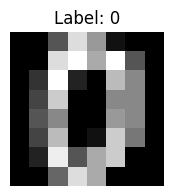

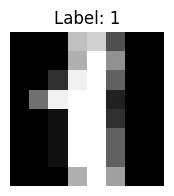

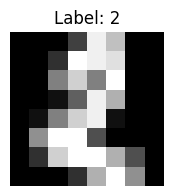

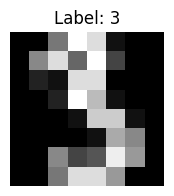

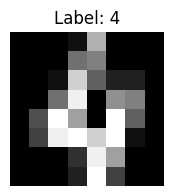

In [3]:
print("Aperçu des 5 premiers échantillons")
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
    plt.show()

### Distribution des classes

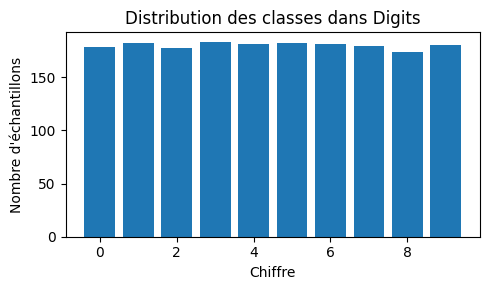

In [4]:
counts = pd.Series(y).value_counts().sort_index()
plt.figure(figsize=(5,3))
plt.bar(counts.index, counts.values)
plt.title("Distribution des classes dans Digits")
plt.xlabel("Chiffre")
plt.ylabel("Nombre d'échantillons")
plt.tight_layout()
plt.show()

### Moyenne des images par classe

Image moyenne par classe


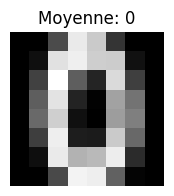

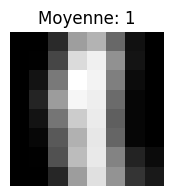

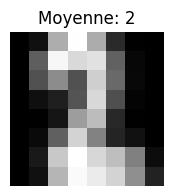

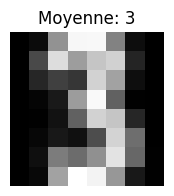

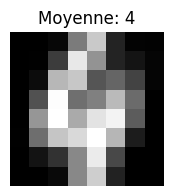

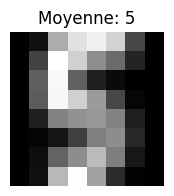

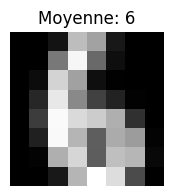

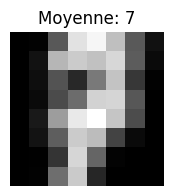

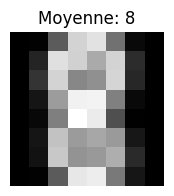

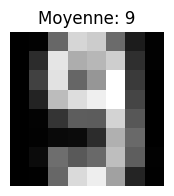

In [5]:
print("Image moyenne par classe")
for digit in range(10):
    avg_img = X[y == digit].mean(axis=0).reshape(8,8)
    plt.figure(figsize=(2,2))
    plt.imshow(avg_img, cmap='gray')
    plt.title(f"Moyenne: {digit}")
    plt.axis('off')
    plt.show()

### Projection PCA en 2D

Projection PCA 2D


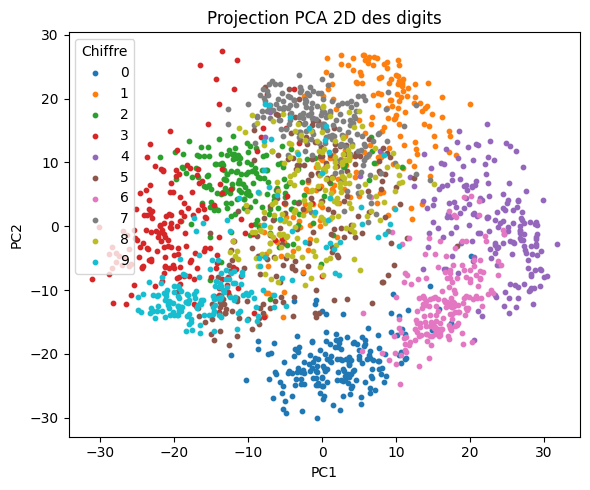

In [6]:
print("Projection PCA 2D")
pca = PCA(n_components=2)
proj = pca.fit_transform(X)
plt.figure(figsize=(6,5))
for digit in range(10):
    idx = y == digit
    plt.scatter(proj[idx, 0], proj[idx, 1], label=str(digit), s=10)
plt.legend(title='Chiffre')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA 2D des digits')
plt.tight_layout()
plt.show()

### Histogramme d'intensité globale des pixels

Histogramme des intensités de pixels


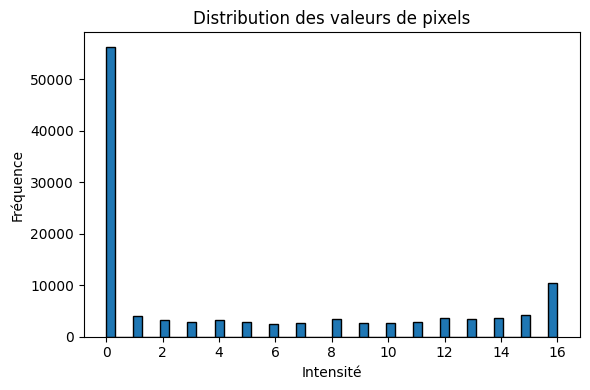

In [7]:
print("Histogramme des intensités de pixels")
plt.figure(figsize=(6,4))
plt.hist(X.flatten(), bins=50, edgecolor='black')
plt.title('Distribution des valeurs de pixels')
plt.xlabel('Intensité')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

## 2. Prétraitement et split

### Standardisation des features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Séparation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## 3. Entraînement du modèle Random Forest

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 4. Évaluation

In [11]:
y_pred = model.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2%}")
print("Classification report:\n", metrics.classification_report(y_test, y_pred))
print("Matrice de confusion:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 97.41%
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.96      0.96      0.96        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.96      0.93      0.95        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

Matrice de confusion:
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  

## 5. Interface interactive de prédiction

In [12]:
idx_slider = widgets.IntSlider(
    value=0, min=0, max=len(X_test)-1,
    step=1, description='Index Test:', continuous_update=False
)
output = widgets.Output()

@output.capture(clear_output=True)
def on_index_change(change):
    idx = change['new']
    sample_img = X_test[idx].reshape(8,8)
    sample = X_test[idx].reshape(1, -1)
    pred = model.predict(sample)[0]
    probs = model.predict_proba(sample)[0]
    # Affichage
    plt.figure(figsize=(3,3))
    plt.imshow(sample_img, cmap='gray')
    plt.title(f"Vrai: {y_test[idx]} | Prédit: {pred}")
    plt.axis('off')
    plt.show()
    print("Probabilités :")
    for i, p in enumerate(probs):
        print(f"  {i}: {p:.2%}")

idx_slider.observe(on_index_change, names='value')

print("Sélectionnez un indice pour tester la prédiction :")
print(f"(0 to {len(X_test)-1})")
display(idx_slider, output)

Sélectionnez un indice pour tester la prédiction :
(0 to 539)


IntSlider(value=0, continuous_update=False, description='Index Test:', max=539)

Output()